<a href="https://colab.research.google.com/github/abiisikumbang/Walmar_sales/blob/main/modeling_walmart_sales_forecast.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

# Membaca dataset
features_df = pd.read_csv("/content/features.csv")
stores_df = pd.read_csv("/content/stores.csv")
train_df = pd.read_csv("/content/train.csv")
test_df = pd.read_csv("/content/test.csv")

# Menampilkan jumlah baris dan kolom dari setiap dataset
dataset_info = {
    "features.csv": features_df.shape,
    "stores.csv": stores_df.shape,
    "train.csv": train_df.shape,
    "test.csv": test_df.shape
}

# Menampilkan beberapa baris pertama dari setiap dataset
sample_data = {
    "features.csv": features_df.head(),
    "stores.csv": stores_df.head(),
    "train.csv": train_df.head(),
    "test.csv": test_df.head()
}

dataset_info, sample_data


({'features.csv': (8190, 12),
  'stores.csv': (45, 3),
  'train.csv': (421570, 5),
  'test.csv': (115064, 4)},
 {'features.csv':    Store        Date  Temperature  Fuel_Price  MarkDown1  MarkDown2  \
  0      1  2010-02-05        42.31       2.572        NaN        NaN   
  1      1  2010-02-12        38.51       2.548        NaN        NaN   
  2      1  2010-02-19        39.93       2.514        NaN        NaN   
  3      1  2010-02-26        46.63       2.561        NaN        NaN   
  4      1  2010-03-05        46.50       2.625        NaN        NaN   
  
     MarkDown3  MarkDown4  MarkDown5         CPI  Unemployment  IsHoliday  
  0        NaN        NaN        NaN  211.096358         8.106      False  
  1        NaN        NaN        NaN  211.242170         8.106       True  
  2        NaN        NaN        NaN  211.289143         8.106      False  
  3        NaN        NaN        NaN  211.319643         8.106      False  
  4        NaN        NaN        NaN  211.350143    

In [2]:
missing_values = {
    "features.csv": features_df.isnull().sum(),
    "stores.csv": stores_df.isnull().sum(),
    "train.csv": train_df.isnull().sum(),
    "test.csv": test_df.isnull().sum()
}

missing_values

{'features.csv': Store              0
 Date               0
 Temperature        0
 Fuel_Price         0
 MarkDown1       4158
 MarkDown2       5269
 MarkDown3       4577
 MarkDown4       4726
 MarkDown5       4140
 CPI              585
 Unemployment     585
 IsHoliday          0
 dtype: int64,
 'stores.csv': Store    0
 Type     0
 Size     0
 dtype: int64,
 'train.csv': Store           0
 Dept            0
 Date            0
 Weekly_Sales    0
 IsHoliday       0
 dtype: int64,
 'test.csv': Store        0
 Dept         0
 Date         0
 IsHoliday    0
 dtype: int64}

In [3]:
# Mengisi missing values di MarkDown1-5 dengan 0
features_df[['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']] = \
    features_df[['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']].fillna(0)

# Mengisi missing values di CPI dan Unemployment dengan median
features_df['CPI'].fillna(features_df['CPI'].median(), inplace=True)
features_df['Unemployment'].fillna(features_df['Unemployment'].median(), inplace=True)

# Mengecek kembali missing values setelah perbaikan
missing_values_after = features_df.isnull().sum()
missing_values_after


<ipython-input-3-3c6024058649>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  features_df['CPI'].fillna(features_df['CPI'].median(), inplace=True)
<ipython-input-3-3c6024058649>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplac

,0
Store,0
Date,0
Temperature,0
Fuel_Price,0
MarkDown1,0
MarkDown2,0
MarkDown3,0
MarkDown4,0
MarkDown5,0
CPI,0


In [4]:
# Mengubah format kolom 'Date' menjadi datetime
features_df['Date'] = pd.to_datetime(features_df['Date'])
train_df['Date'] = pd.to_datetime(train_df['Date'])
test_df['Date'] = pd.to_datetime(test_df['Date'])

# Menggabungkan train dataset dengan stores dan features berdasarkan 'Store' dan 'Date'
train_merged = train_df.merge(stores_df, on="Store", how="left")
train_merged = train_merged.merge(features_df, on=["Store", "Date"], how="left")

# Menggabungkan test dataset dengan stores dan features berdasarkan 'Store' dan 'Date'
test_merged = test_df.merge(stores_df, on="Store", how="left")
test_merged = test_merged.merge(features_df, on=["Store", "Date"], how="left")

# Menampilkan 5 baris pertama dari train_merged untuk memastikan penggabungan berhasil
train_merged.head()


,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y
0,1,1,2010-02-05,24924.50,False,A,151315,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False
1,1,1,2010-02-12,46039.49,True,A,151315,38.51,2.548,0.0,0.0,0.0,0.0,0.0,211.242170,8.106,True
2,1,1,2010-02-19,41595.55,False,A,151315,39.93,2.514,0.0,0.0,0.0,0.0,0.0,211.289143,8.106,False
3,1,1,2010-02-26,19403.54,False,A,151315,46.63,2.561,0.0,0.0,0.0,0.0,0.0,211.319643,8.106,False
4,1,1,2010-03-05,21827.90,False,A,151315,46.50,2.625,0.0,0.0,0.0,0.0,0.0,211.350143,8.106,False


In [5]:
# Menghapus kolom duplikat 'IsHoliday_y'
train_merged.drop(columns=['IsHoliday_y'], inplace=True)
test_merged.drop(columns=['IsHoliday_y'], inplace=True)

# Mengecek distribusi outliers pada Weekly_Sales
train_merged['Weekly_Sales'].describe()


,Weekly_Sales
count,421570.000000
mean,15981.258123
std,22711.183519
min,-4988.940000
25%,2079.650000
50%,7612.030000
75%,20205.852500
max,693099.360000


In [6]:
# Menghapus nilai negatif pada Weekly_Sales
train_merged = train_merged[train_merged['Weekly_Sales'] >= 0]

# Menghitung batas bawah dan atas dengan metode IQR
Q1 = train_merged['Weekly_Sales'].quantile(0.25)
Q3 = train_merged['Weekly_Sales'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Menghapus outliers yang berada di luar batas IQR
train_merged = train_merged[(train_merged['Weekly_Sales'] >= lower_bound) & (train_merged['Weekly_Sales'] <= upper_bound)]

# Mengecek kembali distribusi setelah outlier handling
train_merged['Weekly_Sales'].describe()


,Weekly_Sales
count,384904.000000
mean,10593.254889
std,11348.997900
min,0.000000
25%,1791.657500
50%,6420.000000
75%,15863.287500
max,47494.530000


In [7]:
# Menambahkan fitur berbasis waktu
train_merged["Year"] = train_merged["Date"].dt.year
train_merged["Month"] = train_merged["Date"].dt.month
train_merged["Week"] = train_merged["Date"].dt.isocalendar().week

test_merged["Year"] = test_merged["Date"].dt.year
test_merged["Month"] = test_merged["Date"].dt.month
test_merged["Week"] = test_merged["Date"].dt.isocalendar().week

# Menambahkan rata-rata penjualan per toko (sebagai indikasi tren toko)
avg_sales_per_store = train_merged.groupby("Store")["Weekly_Sales"].mean().rename("Avg_Store_Sales")
train_merged = train_merged.merge(avg_sales_per_store, on="Store", how="left")
test_merged = test_merged.merge(avg_sales_per_store, on="Store", how="left")

# Menampilkan contoh hasil feature engineering
train_merged.head()


,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Year,Month,Week,Avg_Store_Sales
0,1,1,2010-02-05,24924.50,False,A,151315,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,2010,2,5,12899.269016
1,1,1,2010-02-12,46039.49,True,A,151315,38.51,2.548,0.0,0.0,0.0,0.0,0.0,211.242170,8.106,2010,2,6,12899.269016
2,1,1,2010-02-19,41595.55,False,A,151315,39.93,2.514,0.0,0.0,0.0,0.0,0.0,211.289143,8.106,2010,2,7,12899.269016
3,1,1,2010-02-26,19403.54,False,A,151315,46.63,2.561,0.0,0.0,0.0,0.0,0.0,211.319643,8.106,2010,2,8,12899.269016
4,1,1,2010-03-05,21827.90,False,A,151315,46.50,2.625,0.0,0.0,0.0,0.0,0.0,211.350143,8.106,2010,3,9,12899.269016


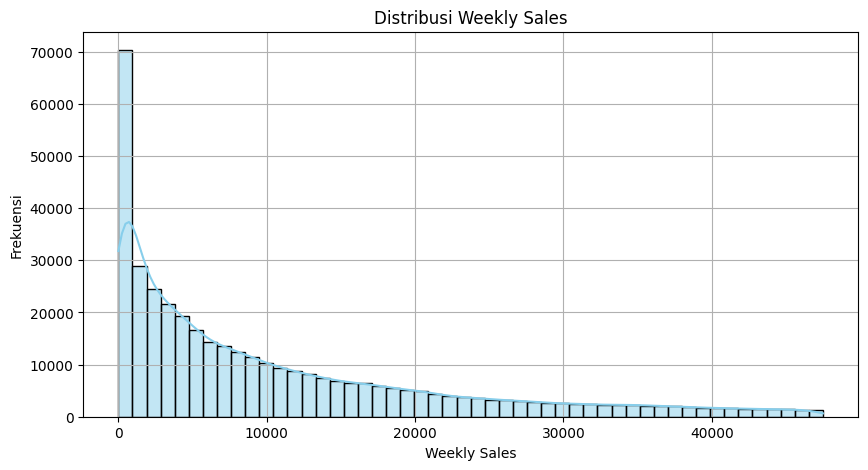

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Mengatur ukuran figure
plt.figure(figsize=(10, 5))

# Plot distribusi Weekly_Sales
sns.histplot(train_merged['Weekly_Sales'], bins=50, kde=True, color="skyblue")
plt.title("Distribusi Weekly Sales")
plt.xlabel("Weekly Sales")
plt.ylabel("Frekuensi")
plt.grid()

# Menampilkan plot
plt.show()


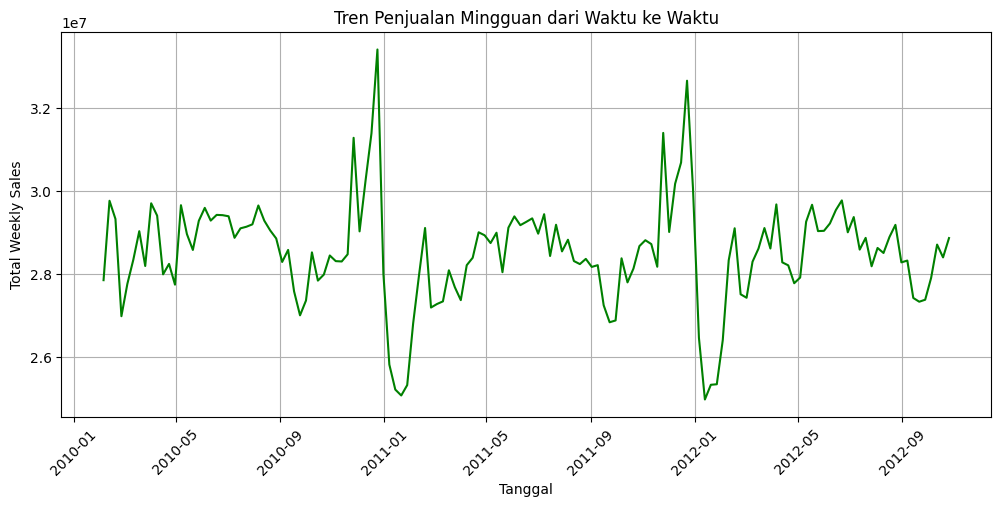

In [9]:
# Menghitung total penjualan per minggu
weekly_sales_trend = train_merged.groupby("Date")["Weekly_Sales"].sum().reset_index()

# Visualisasi tren penjualan mingguan
plt.figure(figsize=(12, 5))
sns.lineplot(x="Date", y="Weekly_Sales", data=weekly_sales_trend, color="green")
plt.title("Tren Penjualan Mingguan dari Waktu ke Waktu")
plt.xlabel("Tanggal")
plt.ylabel("Total Weekly Sales")
plt.xticks(rotation=45)
plt.grid()

# Menampilkan plot
plt.show()


<ipython-input-10-4a27b15702c5>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Type", y="Weekly_Sales", data=sales_by_type, palette="viridis")


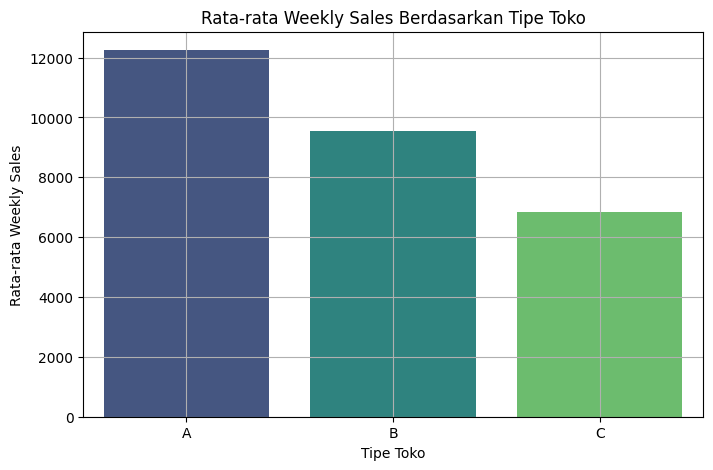

In [10]:
# Menghitung rata-rata penjualan berdasarkan tipe toko
sales_by_type = train_merged.groupby("Type")["Weekly_Sales"].mean().reset_index()

# Visualisasi perbedaan penjualan berdasarkan tipe toko
plt.figure(figsize=(8, 5))
sns.barplot(x="Type", y="Weekly_Sales", data=sales_by_type, palette="viridis")
plt.title("Rata-rata Weekly Sales Berdasarkan Tipe Toko")
plt.xlabel("Tipe Toko")
plt.ylabel("Rata-rata Weekly Sales")
plt.grid()

# Menampilkan plot
plt.show()


<ipython-input-11-df8320f46e32>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="IsHoliday_x", y="Weekly_Sales", data=sales_by_holiday, palette="coolwarm")


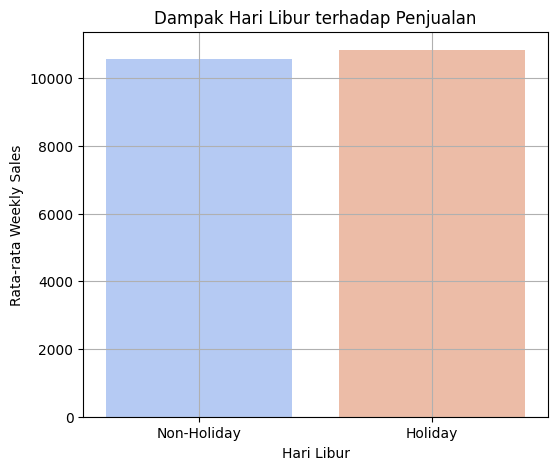

In [11]:
# Menghitung rata-rata penjualan pada hari libur dan hari biasa
sales_by_holiday = train_merged.groupby("IsHoliday_x")["Weekly_Sales"].mean().reset_index()

# Mengubah label untuk visualisasi
sales_by_holiday["IsHoliday_x"] = sales_by_holiday["IsHoliday_x"].replace({False: "Non-Holiday", True: "Holiday"})

# Visualisasi dampak hari libur terhadap penjualan
plt.figure(figsize=(6, 5))
sns.barplot(x="IsHoliday_x", y="Weekly_Sales", data=sales_by_holiday, palette="coolwarm")
plt.title("Dampak Hari Libur terhadap Penjualan")
plt.xlabel("Hari Libur")
plt.ylabel("Rata-rata Weekly Sales")
plt.grid()

# Menampilkan plot
plt.show()


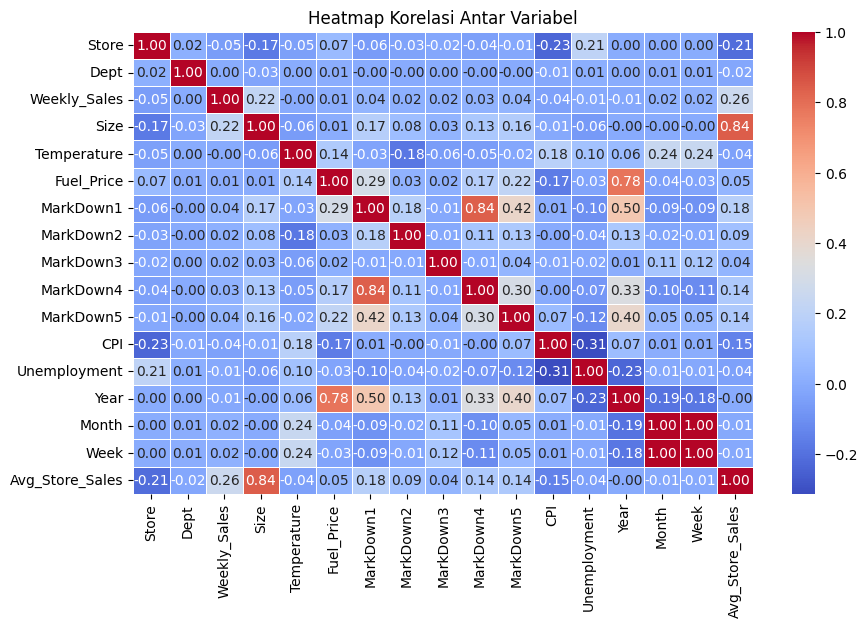

In [12]:
# Menghitung matriks korelasi hanya untuk kolom numerik
correlation_matrix = train_merged.select_dtypes(include=['number']).corr()

# Visualisasi heatmap korelasi
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Heatmap Korelasi Antar Variabel")
plt.show()

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Memilih fitur untuk model
features = ["Store", "Dept", "Size", "IsHoliday_x", "Month", "Week", "Avg_Store_Sales", "Type"]
target = "Weekly_Sales"

# Mengubah variabel kategorikal menjadi numerik
le = LabelEncoder()
train_merged["Type"] = le.fit_transform(train_merged["Type"])
train_merged["IsHoliday_x"] = train_merged["IsHoliday_x"].astype(int)

# Memisahkan fitur dan target
X = train_merged[features]
y = train_merged[target]

# Membagi data menjadi training dan testing set (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Menampilkan bentuk data setelah split
X_train.shape, X_test.shape


((307923, 8), (76981, 8))

In [14]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import numpy as np

# Menyiapkan data untuk clustering
cluster_data = train_merged.groupby("Store").agg({
    "Weekly_Sales": "mean",
    "Size": "mean",
    "Dept": "nunique"  # Jumlah departemen unik per toko
}).reset_index()

# Mengganti nama kolom agar lebih jelas
cluster_data.rename(columns={"Weekly_Sales": "Avg_Store_Sales", "Dept": "Num_Dept"}, inplace=True)

# Standarisasi fitur untuk clustering
scaler = StandardScaler()
cluster_scaled = scaler.fit_transform(cluster_data[["Avg_Store_Sales", "Size", "Num_Dept"]])

# Menampilkan data yang telah diproses
cluster_data.head()


,Store,Avg_Store_Sales,Size,Num_Dept
0,1,12899.269016,151315.0,70
1,2,14410.815765,202307.0,68
2,3,4703.720458,37392.0,71
3,4,14212.958280,205863.0,66
4,5,4336.983596,34875.0,72


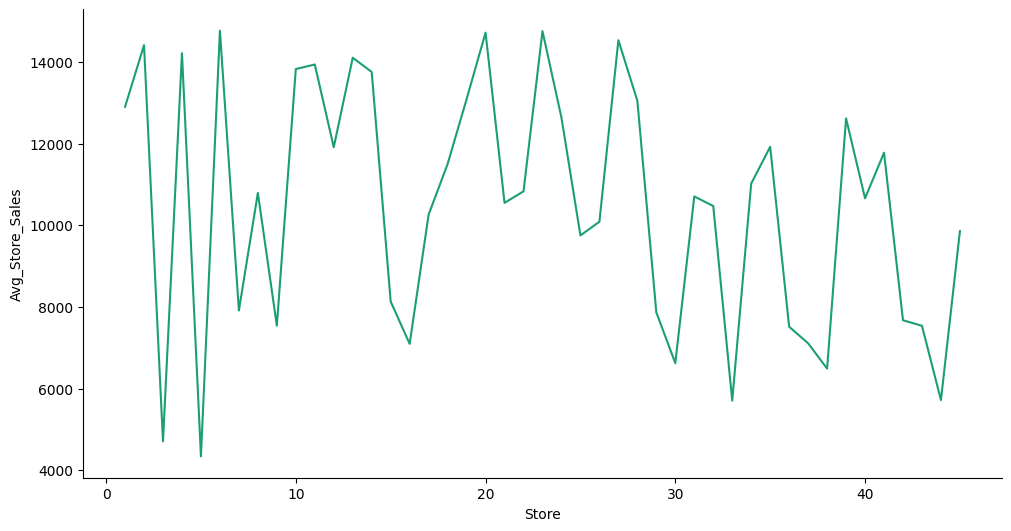

In [15]:
# @title Store vs Avg_Store_Sales

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Store']
  ys = series['Avg_Store_Sales']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = cluster_data.sort_values('Store', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Store')
_ = plt.ylabel('Avg_Store_Sales')

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Mengubah kolom tanggal menjadi numerik (ordinal)
train_df["Date"] = pd.to_datetime(train_df["Date"])
train_df["Date"] = train_df["Date"].map(pd.Timestamp.toordinal)

# Mengubah variabel kategorikal 'IsHoliday' menjadi numerik
train_df["IsHoliday"] = train_df["IsHoliday"].astype(int)

# Memisahkan fitur (X) dan target (y)
X = train_df.drop(columns=["Weekly_Sales"])  # Semua fitur kecuali target
y = train_df["Weekly_Sales"]

# Membagi data menjadi training (80%) dan testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Membuat model Linear Regression
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

# Memprediksi data uji
y_pred = model_lr.predict(X_test)

# Evaluasi model
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

mae, rmse


(15130.696696738225, 22489.338401700323)

In [17]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = RandomForestRegressor(n_estimators=50, random_state=42, n_jobs=-1)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_val)
mae = mean_absolute_error(y_val, y_pred)
rmse = np.sqrt(mean_squared_error(y_val, y_pred))
r2 = r2_score(y_val, y_pred)

print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"R^2 Score: {r2}")


MAE: 1736.8063824655458
RMSE: 4955.245768179806
R^2 Score: 0.9529130844123102


In [18]:
# Mencoba dengan jumlah estimator yang lebih kecil untuk mengurangi beban komputasi
model = RandomForestRegressor(n_estimators=50, random_state=42, n_jobs=-1)
model.fit(X_train, y_train)

# Melakukan prediksi pada data validasi
y_pred = model.predict(X_val)

# Evaluasi model
mae = mean_absolute_error(y_val, y_pred)
rmse = np.sqrt(mean_squared_error(y_val, y_pred))
r2 = r2_score(y_val, y_pred)

mae, rmse, r2


(1736.8063824655455, 4955.245768179806, 0.9529130844123102)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Membuat model regresi menggunakan Random Forest
model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
model.fit(X_train, y_train)

# Melakukan prediksi pada data validasi
y_pred = model.predict(X_val)

# Evaluasi model
mae = mean_absolute_error(y_val, y_pred)
rmse = np.sqrt(mean_squared_error(y_val, y_pred))
r2 = r2_score(y_val, y_pred)

mae, rmse, r2


In [ ]:
# Melakukan prediksi pada dataset uji
# Ensure the features used for training are present in the test data
# with the same names and data types.

# Convert 'IsHoliday_x' to 'IsHoliday' and ensure it's an integer
test_merged['IsHoliday'] = test_merged['IsHoliday_x'].astype(int)

# Convert 'Date' to ordinal representation, similar to how it was done in training
test_merged["Date"] = pd.to_datetime(test_merged["Date"])
test_merged["Date"] = test_merged["Date"].map(pd.Timestamp.toordinal)

# Select the features used during training from test_merged
# This will ensure the correct features and order are used
X_test_final = test_merged[['Store', 'Dept', 'Date', 'IsHoliday']]

# You may need to add any other necessary preprocessing steps
# that were applied to your training data, such as:
# - Converting categorical features to numeric using LabelEncoder
# - Scaling numerical features using StandardScaler

y_test_pred = model.predict(X_test_final)

# Membuat DataFrame hasil prediksi
test_merged["Weekly_Sales_Predicted"] = y_test_pred

# Menampilkan beberapa hasil prediksi
test_merged[["Store", "Dept", "Date", "Weekly_Sales_Predicted"]].head()

In [ ]:
import joblib

# Simpan model ke file
joblib.dump(model, "sales_forecast_model.pkl")


In [ ]:
from flask import Flask, request, jsonify
import joblib
import pandas as pd

# Load model
model = joblib.load("sales_forecast_model.pkl")

# Inisialisasi aplikasi Flask
app = Flask(__name__)

# Endpoint untuk prediksi
@app.route("/predict", methods=["POST"])
def predict():
    data = request.get_json()  # Ambil input JSON
    df = pd.DataFrame([data])  # Konversi ke DataFrame

    # Pilih fitur sesuai model
    features = ["Store", "Dept", "Temperature", "Fuel_Price", "CPI", "Unemployment", "Size", "Type",
                "MarkDown1", "MarkDown2", "MarkDown3", "MarkDown4", "MarkDown5"]

    prediction = model.predict(df[features])[0]  # Prediksi penjualan
    return jsonify({"Weekly_Sales_Predicted": prediction})

# Jalankan aplikasi
if __name__ == "__main__":
    app.run(debug=True)


 * Serving Flask app '__main__'
 * Debug mode: on


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug: * Restarting with stat
